# 데이터 가져오기

- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

In [ ]:
df_X=diabetes.data
df_y=diabetes.target

In [ ]:
print(diabetes.data.shape)

(442, 10)


# 모델에 입력할 데이터 X 준비하기

In [ ]:
type(df_X)

numpy.ndarray

모델에 예측할 데이터 y 준비하기

In [ ]:
type(df_y)

numpy.ndarray

# train 데이터와 test 데이터로 분리하기

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2,random_state=20)



# 모델 준비하기

In [ ]:
W = np.random.rand(10)
b = np.random.rand()

In [ ]:
W

array([0.34212799, 0.2753314 , 0.74658664, 0.16031959, 0.10015981,
       0.93593276, 0.1295541 , 0.62174447, 0.34267984, 0.16628997])

In [ ]:
b

0.2957592259289211

In [ ]:
def model(X, W, b):
    pred = np.sum(X * W, axis=1) + b
    return pred

#손실함수 loss 정의하기

In [ ]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [ ]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


# 기울기를 구하는 gradient 함수 구현하기


In [ ]:
def gradient(X, W, b, y):
   N = len(W)

   y_pred = model(X, W, b)

   dW = 1/N * 2 * X.T.dot(y_pred - y)

   db = 2 * (y_pred - y).mean()
   return dW, db

In [ ]:
dW, db = gradient(X_train, W, b, y_train)
print("dW:", dW)
print("db:", db)

dW: [ -44.87805061  -11.34073418 -159.3306969  -130.49663042  -64.73798127
  -58.76324933  112.44893465 -122.92537372 -151.86279902 -107.45178556]
db: -308.84750470229477


# 하이퍼 파라미터인 학습률 설정하기

In [ ]:
LEARNING_RATE = 1e-2

# 모델 학습하기

In [ ]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 21504.6215
Iteration 20 : Loss 15960.1999
Iteration 30 : Loss 12210.4957
Iteration 40 : Loss 9663.5255
Iteration 50 : Loss 7923.6090
Iteration 60 : Loss 6726.1593
Iteration 70 : Loss 5894.1485
Iteration 80 : Loss 5309.0426
Iteration 90 : Loss 4891.3950
Iteration 100 : Loss 4587.8877
Iteration 110 : Loss 4362.6766
Iteration 120 : Loss 4191.6115
Iteration 130 : Loss 4058.3734
Iteration 140 : Loss 3951.8937
Iteration 150 : Loss 3864.6288
Iteration 160 : Loss 3791.4054
Iteration 170 : Loss 3728.6487
Iteration 180 : Loss 3673.8644
Iteration 190 : Loss 3625.2916
Iteration 200 : Loss 3581.6699
Iteration 210 : Loss 3542.0825
Iteration 220 : Loss 3505.8501
Iteration 230 : Loss 3472.4595
Iteration 240 : Loss 3441.5148
Iteration 250 : Loss 3412.7044
Iteration 260 : Loss 3385.7777
Iteration 270 : Loss 3360.5296
Iteration 280 : Loss 3336.7893
Iteration 290 : Loss 3314.4121
Iteration 300 : Loss 3293.2745
Iteration 310 : Loss 3273.2692
Iteration 320 : Loss 3254.3025
Iteration 330 

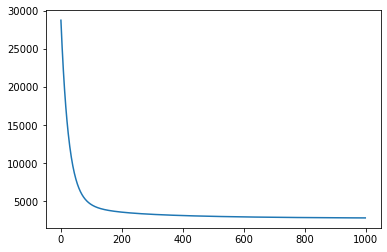

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

테스트 성능확인하기

In [ ]:
losses[-1]

2822.420626278134

In [ ]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3335.7941104608744

# 정답 데이터와 예측한 데이터 시각화하기

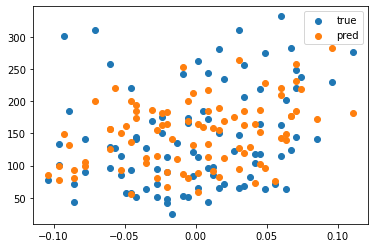

In [ ]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()

<function matplotlib.pyplot.show>

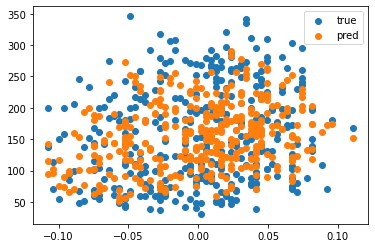

In [ ]:
plt.scatter(X_train[:, 0], y_train, label="true")
plt.scatter(X_train[:, 0], model(X_train, W, b), label='pred')
plt.legend()
plt.show

회고

노드랑 비슷한 코드였기에 수월하였고

학습률 조정이 중요한거 같았다. 학습률 마다 손실함수 값이 달라서 여러번 시도했지만 
1e-2 값이 괜찮은거같았다
언젠간 머릿속에서 노드를 보지않고 잘 술술 코드를 작성하는날이 왔으면 좋겠다